connect 4
---


to do
- finish diagonal win checkers using np.diagonal / np.diag
- finish all-board win check
- finish win behavior

In [1]:
import os
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [174]:
class GameBoard:
    def __init__(self, board_shape = (6,7)):
        self.shape = board_shape
        self.grid = np.full(board_shape, 0)
        black = (0.2,0.2,0.2)
        red = (0.9, 0.3,0.3)
        blue = (0.3,0.3,0.9)
        self.colors = {
            0:black,
            1:red,
            -1:blue
        }
        
    def drop(self, color, column):
        #check if the column is full first
        if self.grid[0,column] != 0:
            print(f'Cannot drop a {color} in full column {column}!')
            return self.grid
        else:
            dropping = True
            current_row = 0
            
            #drop the color until the spot below is filled
            while dropping:
                #if it hits the bottom, stop falling
                if current_row == self.shape[0]-1:
                    dropping = False
                #if the next row is empty, drop to it
                elif self.grid[current_row + 1, column] == 0:
                    current_row += 1
                else:
                    dropping = False
                    
            #assign the color to the spot in the grid
            self.grid[current_row, column] = color
            return self.grid
    
    #converts the grid to plottable colors
    def grid_to_color(self, color_dict_in = None):
        if color_dict_in == None:
            color_dict = self.colors
        else:
            color_dict = color_dict_in
        color_grid = self.grid
        color_grid = [
            [
                color_dict[value]
                for value in row
            ]
            for row in color_grid
        ]
        color_grid = np.array(color_grid)
        return color_grid
    
    #shows the grid with plt.imshow
    def show(self, figsize = (6,7), colors = None):
#         if colors == None:
#             color_dict
        fig, ax = plt.subplots(figsize = figsize)
        grid_pic = self.grid_to_color()
        plt.imshow(grid_pic)
        ax.set_xticks(np.arange(-.5, 7, 1))
        ax.set_yticks(np.arange(-.5, 6, 1))
        plt.grid(True)
                    

In [142]:
board = GameBoard()
board.drop(1,5)
board.drop(-1,4)
board.drop(1,6)
board.drop(-1,6)
board.drop(1,6)

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0, -1,  1,  1]])

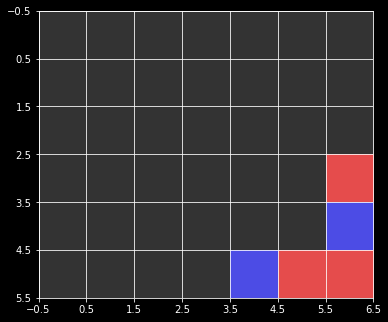

In [143]:
board.show()

In [240]:
# make a game

class ConnectFour(GameBoard):
    def __init__(self, starting_player = 1, second_player = -1, board_shape = (6,7)):
        super().__init__(board_shape)
        self.current_player = 0
        self.players = [starting_player, second_player]
        self.turns = 0
        self.winner = None
        self.done = False
        
    def reset(self):
        self.grid = np.full(self.shape, 0)
        self.turns = 0
        self.winner = None
        self.done = False
          
    #checks a single row
    def four_in_row(self, row):
        for window in range(self.shape[1]-4):
            if abs(self.grid[row, window:window+4].sum()) == 4:
                return True
        return False
    
    #checks a single column
    def four_in_col(self, col):
        for window in range(self.shape[0]-4):
            if abs(self.grid[window:window+4, col].sum()) == 4:
                return True
        return False
    
    #############
    #
    ######
    
    
    def four_in_maj_diag(self, diag):
        #scan major diagonals drawn from upper left across
        for window in range(max(self.shape)):
            
            
    
    def four_in_min_diag(self, diag):
        pass
    
    
    #drop the color of the current player and deal with the consequences
    
    def play(self, column):
        self.drop(self.players[self.current_player], column)
        
        ##check if state is win
        self.check_win
        
    def check_win(self):
        if self.done:
            self.winner = self.players[current_player]
            print(f'{self.winner} wins')
        else:
            self.current_player = (self.current_player+1)%2

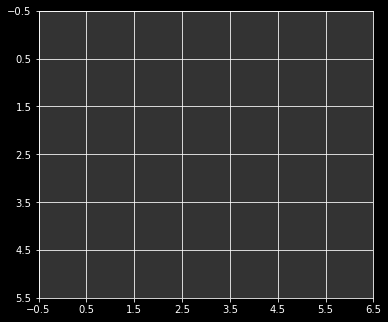

In [251]:
c4.show()

In [250]:
np.diag(c4.grid, 4)

array([0, 0, 0])

In [241]:
c4 = ConnectFour()

In [242]:
c4

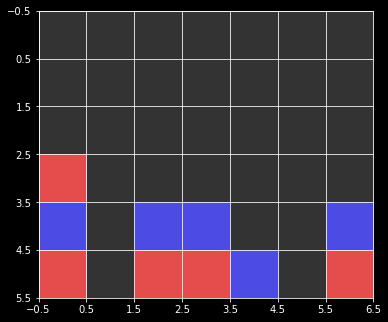

In [263]:
c4.play(2)
c4.show()

In [277]:
np.fliplr(c4.grid)

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1],
       [-1,  0,  0, -1, -1,  0, -1],
       [ 1,  0, -1,  1,  1,  0,  1]])

In [260]:
c4.four_in_row(5)

False

In [215]:
c4.grid[:,5:]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])